In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False)

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # CIFAR-10은 10개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 낮은 학습률로 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 준비 (CIFAR-10 데이터셋)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 레이블을 원-핫 인코딩 형태로 변환
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 데이터셋을 모델에 맞게 변환
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=10,
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)


Epoch 1/10
1562/1562 [==============================] - 420s 258ms/step - loss: 1.6570 - accuracy: 0.4196 - val_loss: 1.4204 - val_accuracy: 0.5189
Epoch 2/10
1562/1562 [==============================] - 397s 254ms/step - loss: 1.2987 - accuracy: 0.5535 - val_loss: 1.3954 - val_accuracy: 0.5788
Epoch 3/10
1562/1562 [==============================] - 398s 255ms/step - loss: 1.2070 - accuracy: 0.5855 - val_loss: 1.6647 - val_accuracy: 0.4877
Epoch 4/10
1562/1562 [==============================] - 398s 255ms/step - loss: 1.2118 - accuracy: 0.5858 - val_loss: 2.5511 - val_accuracy: 0.3425
Epoch 5/10
1562/1562 [==============================] - 399s 255ms/step - loss: 1.2611 - accuracy: 0.5678 - val_loss: 1.8452 - val_accuracy: 0.5048
Epoch 6/10
1562/1562 [==============================] - 408s 261ms/step - loss: 1.1518 - accuracy: 0.6039 - val_loss: 3.0148 - val_accuracy: 0.3559
Epoch 7/10
1562/1562 [==============================] - 409s 262ms/step - loss: 1.2830 - accuracy: 0.5558 - val_

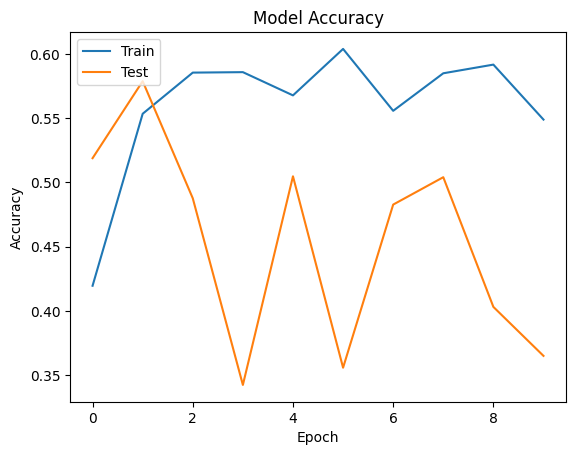

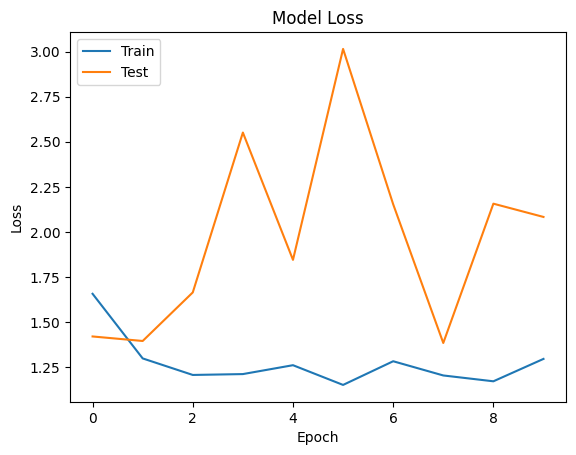

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False)

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # 노드 수를 1024에서 512로 줄임
x = Dropout(0.5)(x)  # 드롭아웃 레이어 추가
predictions = Dense(10, activation='softmax')(x)  # CIFAR-10은 10개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 조금 더 높은 학습률로 모델 컴파일
model.compile(optimizer=Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 준비 (CIFAR-10 데이터셋)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 레이블을 원-핫 인코딩 형태로 변환
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 데이터 증강 정도를 줄임
train_datagen = ImageDataGenerator(
    rotation_range=20,  # 회전 범위를 40에서 20으로 줄임
    width_shift_range=0.1,  # 이동 범위를 줄임
    height_shift_range=0.1,  # 이동 범위를 줄임
    shear_range=0.1,  # 전단 변환 범위를 줄임
    zoom_range=0.1,  # 확대/축소 범위를 줄임
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

# 에폭 수를 늘림
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=20,  # 에폭 수를 10에서 20으로 늘림
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)


9406464/9406464 [==============================] - 1s 0us/step


170498071/170498071 [==============================] - 8s 0us/step
Epoch 1/20
1562/1562 [==============================] - 404s 247ms/step - loss: 1.6396 - accuracy: 0.4346 - val_loss: 1.8444 - val_accuracy: 0.3939
Epoch 2/20
1562/1562 [==============================] - 374s 240ms/step - loss: 1.3572 - accuracy: 0.5329 - val_loss: 1.8083 - val_accuracy: 0.4564
Epoch 3/20
1562/1562 [==============================] - 376s 241ms/step - loss: 1.3255 - accuracy: 0.5429 - val_loss: 2.9153 - val_accuracy: 0.3185
Epoch 4/20
1562/1562 [==============================] - 372s 238ms/step - loss: 1.3865 - accuracy: 0.5180 - val_loss: 2.7542 - val_accuracy: 0.3420
Epoch 5/20
1562/1562 [==============================] - 373s 239ms/step - loss: 1.3374 - accuracy: 0.5364 - val_loss: 4.3466 - val_accuracy: 0.1379
Epoch 6/20
1562/1562 [==============================] - 373s 239ms/step - loss: 1.4312 - accuracy: 0.4958 - val_loss: 1.6382 - val_accuracy: 0.5279
Epoch 7/20
1562/1562 [=======================

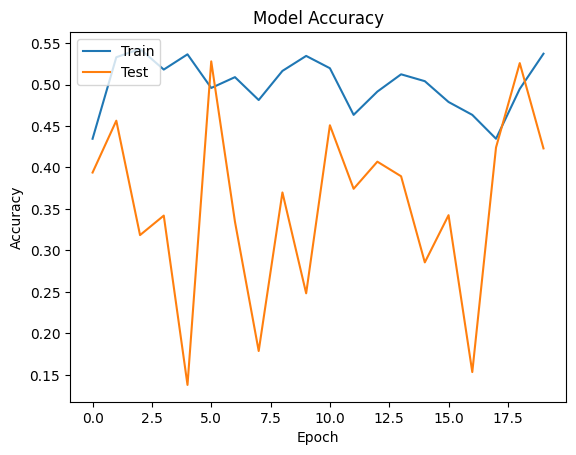

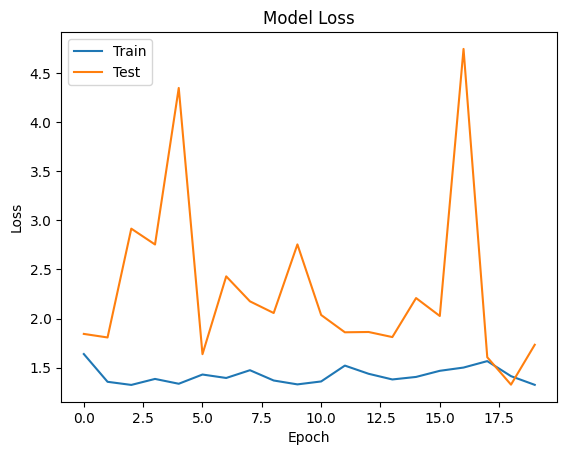

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:

    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # 노드 수를 1024에서 512로 줄임
x = Dropout(0.5)(x)  # 드롭아웃 레이어 추가
predictions = Dense(10, activation='softmax')(x)  # CIFAR-10은 10개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 조금 더 높은 학습률로 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 준비 (CIFAR-10 데이터셋)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 레이블을 원-핫 인코딩 형태로 변환
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 데이터 증강 정도를 줄임
train_datagen = ImageDataGenerator(
    rotation_range=10,  # 회전 범위를 20에서 10으로 줄임
    width_shift_range=0.1,  # 이동 범위를 줄임
    height_shift_range=0.1,  # 이동 범위를 줄임
    shear_range=0.1,  # 전단 변환 범위를 줄임
    zoom_range=0.1,  # 확대/축소 범위를 줄임
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

# 에폭 수를 늘림
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=30,  # 에폭 수를 20에서 30으로 늘림
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)


Epoch 1/30
1562/1562 [==============================] - 385s 236ms/step - loss: 1.5624 - accuracy: 0.4692 - val_loss: 1.6359 - val_accuracy: 0.3646
Epoch 2/30
1562/1562 [==============================] - 366s 234ms/step - loss: 1.1566 - accuracy: 0.6102 - val_loss: 1.3099 - val_accuracy: 0.5949
Epoch 3/30
1562/1562 [==============================] - 361s 231ms/step - loss: 1.0636 - accuracy: 0.6459 - val_loss: 1.1718 - val_accuracy: 0.6355
Epoch 4/30
1562/1562 [==============================] - 363s 232ms/step - loss: 1.0242 - accuracy: 0.6622 - val_loss: 1.6740 - val_accuracy: 0.5253
Epoch 5/30
1562/1562 [==============================] - 367s 235ms/step - loss: 0.9786 - accuracy: 0.6746 - val_loss: 1.0989 - val_accuracy: 0.6720
Epoch 6/30
1562/1562 [==============================] - 364s 233ms/step - loss: 0.9269 - accuracy: 0.6887 - val_loss: 1.4798 - val_accuracy: 0.5149
Epoch 7/30
1562/1562 [==============================] - 365s 234ms/step - loss: 0.9061 - accuracy: 0.6936 - val_

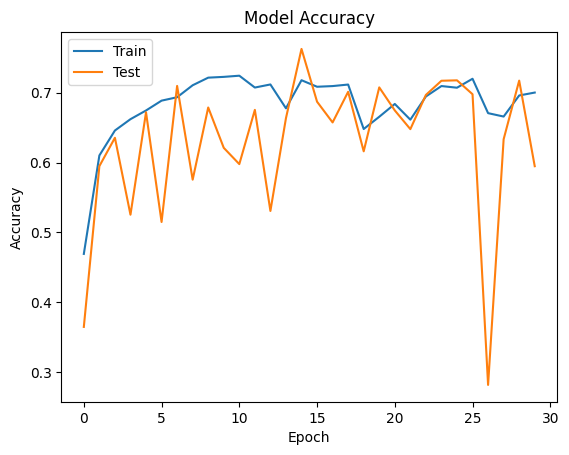

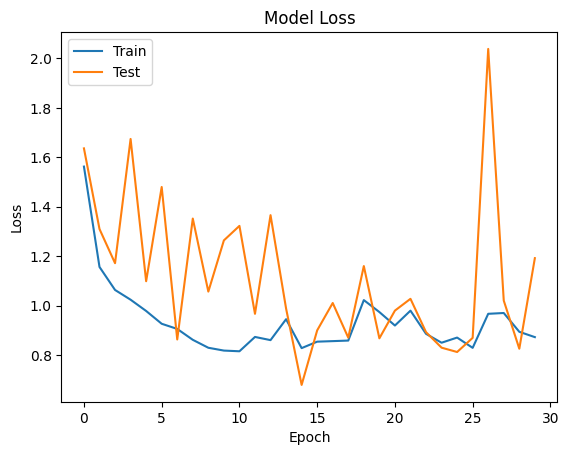

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:

    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # 노드 수를 1024에서 512로 줄임
x = Dropout(0.5)(x)  # 드롭아웃 레이어 추가
predictions = Dense(10, activation='softmax')(x)  # CIFAR-10은 10개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 조금 학습률 낮추어 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 준비 (CIFAR-10 데이터셋)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 레이블을 원-핫 인코딩 형태로 변환
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 데이터 증강 정도를 줄임
train_datagen = ImageDataGenerator(
    rotation_range=20,  # 회전 범위를 20
    width_shift_range=0.1,  # 이동 범위를 줄임
    height_shift_range=0.1,  # 이동 범위를 줄임
    shear_range=0.1,  # 전단 변환 범위를 줄임
    zoom_range=0.1,  # 확대/축소 범위를 줄임
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

# 에폭 수를 늘림
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=10,  # 에폭 수를 10
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)

Epoch 1/10
1562/1562 [==============================] - 377s 231ms/step - loss: 2.2306 - accuracy: 0.2527 - val_loss: 2.2094 - val_accuracy: 0.2101
Epoch 2/10
1562/1562 [==============================] - 358s 229ms/step - loss: 1.6959 - accuracy: 0.3959 - val_loss: 1.7155 - val_accuracy: 0.4700
Epoch 3/10
1562/1562 [==============================] - 358s 229ms/step - loss: 1.5011 - accuracy: 0.4720 - val_loss: 1.3571 - val_accuracy: 0.5377
Epoch 4/10
1562/1562 [==============================] - 358s 229ms/step - loss: 1.3660 - accuracy: 0.5235 - val_loss: 1.2114 - val_accuracy: 0.5885
Epoch 5/10
1562/1562 [==============================] - 359s 230ms/step - loss: 1.2642 - accuracy: 0.5609 - val_loss: 1.1532 - val_accuracy: 0.6066
Epoch 6/10
1562/1562 [==============================] - 363s 233ms/step - loss: 1.1813 - accuracy: 0.5923 - val_loss: 1.0368 - val_accuracy: 0.6371
Epoch 7/10
1562/1562 [==============================] - 359s 230ms/step - loss: 1.1178 - accuracy: 0.6151 - val_

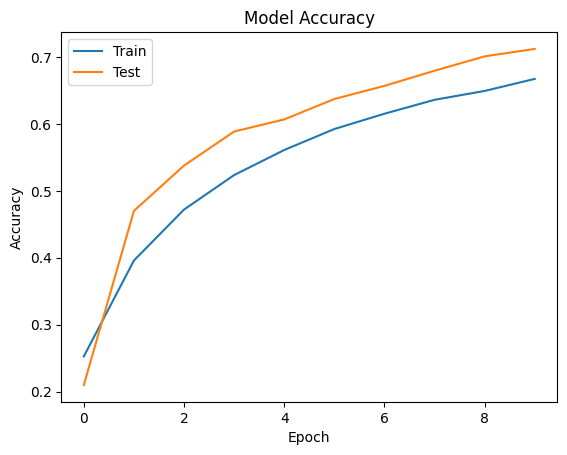

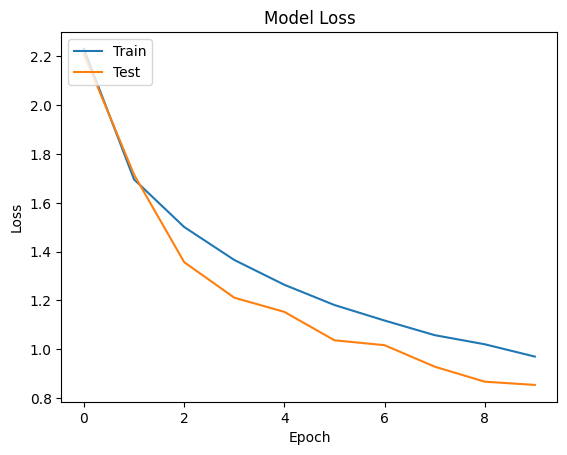

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()